# Milestone 2: Descriptive Statistics  /Preparation By Aiman

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

Aftering importing the data, and doing initial analysis on the data, the next step is to dividie the athelte_events table into winter and summer tables.



In [15]:
summer_events = pysqldf('''SELECT * 
           FROM athlete_events 
           WHERE Season = 'Summer' ''')


In [16]:
winter_events = pysqldf('''SELECT * 
           FROM athlete_events 
           WHERE Season = 'Winter' ''')

# summary of the different descriptive statistics

In [17]:
pysqldf('''SELECT Sex, 
           COUNT(Sex) AS Athlete,
           (COUNT(*) * 100.0) / SUM(COUNT(*)) OVER() AS Ratio
           FROM summer_events
           GROUP BY Sex
           ''')

,Sex,Athlete,Ratio
0,F,59443,26.709713
1,M,163109,73.290287


In [18]:
pysqldf('''SELECT Sex, 
           COUNT(Sex) AS Athlete,
           (COUNT(*) * 100.0) / SUM(COUNT(*)) OVER() AS Ratio
           FROM winter_events
           GROUP BY Sex
           ''')

,Sex,Athlete,Ratio
0,F,15079,31.049749
1,M,33485,68.950251


As we can see the ratio between the Summer Olympics and the Winter Olympics is indeed different, men happen to be dominant.

In [19]:
pysqldf('''SELECT Sex, 
           AVG(Weight),
           AVG(Age),
           AVG(Height)
           FROM summer_events
           GROUP BY Sex
           ''')

,Sex,AVG(Weight),AVG(Age),AVG(Height)
0,F,60.087644,23.660997,168.169025
1,M,75.604195,26.443944,178.901874


In [20]:
pysqldf('''SELECT Sex, 
           AVG(Weight),
           AVG(Age),
           AVG(Height)
           FROM winter_events
           GROUP BY Sex
           ''')

,Sex,AVG(Weight),AVG(Age),AVG(Height)
0,F,59.755156,24.014398,166.528250
1,M,76.357058,25.504261,178.668699


Sex Differences: The data shows that there are notable differences between male and female participants across various attributes, including height, weight, and age. These differences are expected due to biological factors.

Age Consideration: While the height and weight differences can be attributed to biological factors, the age difference might have additional factors at play. It's essential to explore social factors and potential cultural influences that contribute to the age disparity.

Social Factors: The analysis suggests that the age variations might not be solely due to natural processes but could involve societal factors. Social factors such as participation rates, career timing, and societal expectations could contribute to the observed differences in ages between male and female participants.

Seasonal Age Gap: The observation of a smaller age gap in the Winter Olympics (~2.8 years for males and ~1.5 years for females) compared to the Summer Olympics might indicate distinct trends in athlete selection or career longevity between the two events.

# Decoding Olympic Success: Unraveling Medal Patterns

Digging deeper, I've taken a closer look at medal ratios. By studying the distribution of overall medals and changes in different medal ratios, I aim to uncover hidden insights. This exploration is important because it helps us understand how Olympic achievements have transformed over the years. Through this analysis, I'm seeking to grasp how different factors have influenced the way medals are awarded, offering a glimpse into the evolving landscape of athlete accomplishments.

In [21]:
pysqldf('''SELECT Sex,Medal,count(Medal) AS medal_count
           FROM summer_events
           WHERE Medal IS NOT NULL
           GROUP BY Medal,Sex
           ''')

,Sex,Medal,medal_count
0,F,Bronze,3174
1,M,Bronze,8235
2,F,Gold,3140
3,M,Gold,8319
4,F,Silver,3128
5,M,Silver,8092


In [22]:
pysqldf('''SELECT Sex,Medal,count(Medal) AS medal_count
           FROM winter_events
            WHERE Medal IS NOT NULL
           GROUP BY Medal,Sex
           ''')

,Sex,Medal,medal_count
0,F,Bronze,597
1,M,Bronze,1289
2,F,Gold,607
3,M,Gold,1306
4,F,Silver,607
5,M,Silver,1289


In [23]:
summer_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY Year 
                        )
                       ''')

In [24]:
winter_medals = pysqldf('''
        SELECT
              Year,
              CAST(medal_count AS FLOAT)/ total_count AS medal_ratio,
              CAST(gold_count AS FLOAT)/ medal_count AS gold_ratio,
              CAST(silver_count AS FLOAT)/ medal_count AS silver_ratio,
              CAST(bronze_count AS FLOAT)/ medal_count AS bronze_ratio
          FROM
        (
                SELECT 
                  Year,
                  COUNT(*) AS total_count,
                  SUM(CASE
                        WHEN Medal IS NOT NULL THEN 1 ELSE 0 
                      END) AS medal_count,
                  SUM(CASE
                        WHEN Medal = "Gold" THEN 1 ELSE 0 
                      END) AS gold_count,
                  SUM(CASE
                        WHEN Medal = "Silver" THEN 1 ELSE 0 
                      END) AS silver_count,
                  SUM(CASE
                        WHEN Medal = "Bronze" THEN 1 ELSE 0 
                      END) AS bronze_count
                  FROM winter_events
                  GROUP BY Year
                  
                )
            ''')

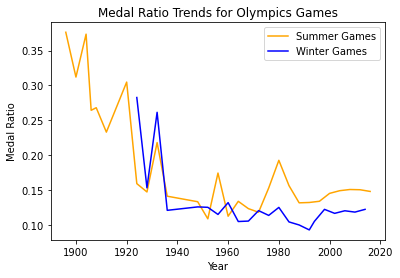

In [25]:
plt.plot(summer_medals.Year,summer_medals.medal_ratio, color = "Orange", label = "Summer Games")
plt.plot(winter_medals.Year,winter_medals.medal_ratio, color = "Blue", label = "Winter Games")
plt.xlabel("Year") 
plt.ylabel("Medal Ratio")
plt.legend()
plt.title("Medal Ratio Trends for Olympics Games")
plt.show()

# Summary: Insights from Medal Ratio Trends in Winter and Summer Games
The medal ratio trends in both Winter and Summer Games over the last century reveal intriguing insights:

Stabilization of Performance:The fluctuating medal ratios eventually stabilized, indicating the establishment of performance norms and standards in both competitions.

Cyclic Patterns:Cyclic patterns in the ratios suggest recurring phases of strong and weak performances, potentially influenced by changing training techniques and geopolitical events.

Impact of Global Events: Notable world events like World Wars impacted athlete participation and performance, leading to shifts in medal ratios.

Evolution of Competition: Fluctuations may reflect changing competitive landscapes, with certain countries or regions dominating during specific eras.

Socioeconomic Influence: Socioeconomic factors, technological advancements, and athlete development programs contributed to variations in performance levels.

Host Country Effect: Medal ratios could be influenced by host countries' preparations, emphasis on specific sports, and home-field advantage.

Economic and Technological Progress:Advancements in athlete training methods, nutrition, and equipment influenced overall performance levels.

Long-Term Trends: An analysis of trends over time could identify periods of significant performance shifts, offering insights into broader sports developments.

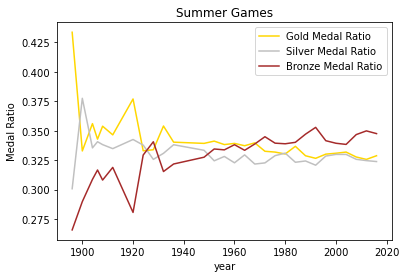

In [26]:
plt.plot(summer_medals.Year,summer_medals.gold_ratio, color = "gold", label = "Gold Medal Ratio")
plt.plot(summer_medals.Year,summer_medals.silver_ratio, color = "silver", label = "Silver Medal Ratio")
plt.plot(summer_medals.Year,summer_medals.bronze_ratio, color = "brown", label = "Bronze Medal Ratio")
plt.legend()
plt.title("Summer Games")
plt.xlabel("year")
plt.ylabel("Medal Ratio")
plt.show()

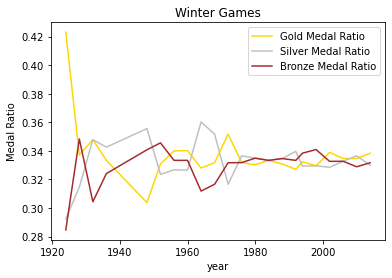

In [27]:
plt.plot(winter_medals.Year,winter_medals.gold_ratio, color = "gold", label = "Gold Medal Ratio")
plt.plot(winter_medals.Year,winter_medals.silver_ratio, color = "silver", label = "Silver Medal Ratio")
plt.plot(winter_medals.Year,winter_medals.bronze_ratio, color = "brown", label = "Bronze Medal Ratio")
plt.legend()
plt.title("Winter Games")
plt.xlabel("year")
plt.ylabel("Medal Ratio")
plt.show()

# Key points about the data

1.Gender Age Gap in Winter Olympics: An intriguing finding was that the age gap between male and female participants in the Winter Olympics is narrower compared to the Summer Olympics. This suggests a potential shift in gender dynamics and age distributions within the two types of Olympic events.

2.Stabilization of Medal Outcomes: Notably, recent Olympic data indicates that the percentage of participants who win medals and the relative ratio of different medal types (gold, silver, and bronze) have reached a point of stability. This observation implies that there may have been an establishment of consistent performance standards among athletes.

3.Diverse Participant Numbers: An important insight emerged from analyzing participant numbers separately for Summer and Winter Olympics. These two types of events exhibit distinct differences in terms of participant counts, warranting separate analyses to better understand the dynamics and trends specific to each Olympic category.

4.Effect of Global Events: It was observed that certain global events, such as World Wars, had a significant impact on athlete participation and performance, leading to shifts in medal ratios. These events not only disrupted the continuity of the games but also influenced the competitive landscape and ultimately medal distribution.


#  Initial hypotheses: The ratio of women to men has Increased OR Decreased?

In [28]:
f_to_m_ratio_summers = pysqldf('''
          SELECT Year,
                CAST(female_count AS FLOAT)/ male_count AS Ratio
           FROM(
           SELECT 
              Year,
              SUM(CASE WHEN Sex = 'F' THEN 1 ELSE 0
              END) AS female_count,
              SUM(CASE WHEN Sex = 'M' THEN 1 ELSE 0
              END) AS male_count
              FROM summer_events
              GROUP BY Year
             )
''')

In [29]:
f_to_m_ratio_winters = pysqldf('''
          SELECT Year,
                CAST(female_count AS FLOAT)/ male_count AS Ratio
           FROM(
           SELECT 
              Year,
              SUM(CASE WHEN Sex = 'F' THEN 1 ELSE 0
              END) AS female_count,
              SUM(CASE WHEN Sex = 'M' THEN 1 ELSE 0
              END) AS male_count
              FROM winter_events
              GROUP BY Year
             )
''')

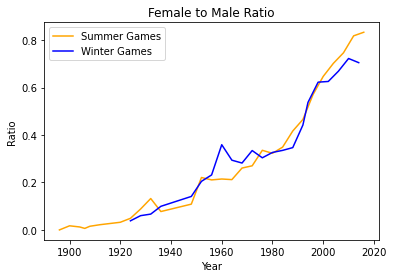

In [30]:
plt.plot(f_to_m_ratio_summers.Year,f_to_m_ratio_summers.Ratio, color = "Orange", label = "Summer Games")
plt.plot(f_to_m_ratio_winters.Year,f_to_m_ratio_winters.Ratio, color = "Blue", label = "Winter Games")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.title("Female to Male Ratio")
plt.show()

The change in the ratio of women to men in Olympic participation aligns with the assumption that Over the years, the ratio of  women to men has shown an increasing trend.(Initial hypotheses proved) However, a noteworthy observation is that during the Second World War, there was a significant decline in the proportion of women participating in the Summer Olympics. Nevertheless, the ratio subsequently resumed its upward trajectory. While this pattern is evident, further analysis is required to fully understand the underlying reasons behind this phenomenon. 

# Additional questions

I plan to put my next two hypotheses to the test using A/B testing. Here are the hypotheses:

1.In the Winter Olympics, the yearly performance of different countries varies significantly.
2.A country’s performance in the Winter Olympics is connected to how it performs in the Summer Olympics.

To explore these ideas, I'll be using A/B testing. For first one, I'll see if countries show big differences in their performance from one Winter Olympics to the next. And for the other, I'll dig into whether how a country does in the Winter Olympics is linked to its Summer Olympics performance.